# Experiment 2

## Weather in Australia
https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

This dataset contains about 10 years of daily weather observations from many locations across Australia.

In [154]:
import pandas as pd
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from misc_utilities import regression_metrics, plot_hist_all_columns

df = pd.read_csv("weatherAUS.csv")

## Analyse probleem
#### Wat is het probleem?
De target vector is rainfall, waar we voorspellen hoeveel regen er die dag gevallen is.
#### Dimensies dataset?

In [155]:
print(f'Rows/Columns: {df.shape}')
print(df.isnull().sum())

Rows/Columns: (145460, 23)
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


#### Soorten data/features?

In [156]:
print(df.head(10))
print(df.describe())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
5  2008-12-06   Albury     14.6     29.7       0.2          NaN       NaN   
6  2008-12-07   Albury     14.3     25.0       0.0          NaN       NaN   
7  2008-12-08   Albury      7.7     26.7       0.0          NaN       NaN   
8  2008-12-09   Albury      9.7     31.9       0.0          NaN       NaN   
9  2008-12-10   Albury     13.1     30.1       1.4          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1     

## Methoden
#### Welke preprocessing is nodig?
Er zijn veel nul waarden die we moeten weghalen. Voor de numerieke kolommen vervangen we dit met het gemiddelde, voor
de categorieke kolommen verwijderen we de rijen. Als laatst moeten de categorieke kolommen worden omgezet naar numeriek.
#### Welke modellen ga je vergelijken?
Ik ga LinearRegression gebruiken, omdat die mooi simpel is, en BayesianRidge omdat die het eerste voorbeeld was die ik
zag van een bayesian regressie model.
#### Welke performance metric is passend?
Na het bekijken van de histogrammen (onderaan), lijkt het er niet op dat we grote uitschieters hebben, en daarom is
RMSE een prima keuze.

## Voorspelling
#### Welke classifier zal het beste zijn en waarom?
Mijn verwachting is dat BayesianRidge het beter zal doen, omdat ik denk dat er niet een enorm grote relatie zal zitten
tussen de features.


## Process

In [157]:
df.drop(['Date', 'Location', 'RainToday', 'RainTomorrow'], axis=1, inplace=True)
df.fillna(df.mean(),inplace=True)
df.dropna(inplace=True)

In [158]:
enc = LabelEncoder()
df['WindGustDir'] = enc.fit_transform(df['WindGustDir'])
df['WindDir3pm'] = enc.fit_transform(df['WindDir3pm'])
df['WindDir9am'] = enc.fit_transform(df['WindDir9am'])

In [159]:
labels = df['Rainfall']
df.drop(['Rainfall'], inplace=True, axis=1)
X_train, X_test, y_train, y_test = train_test_split(df, labels, random_state=5, train_size=0.8)

In [160]:
lreg = LinearRegression(normalize=True)
bridge = BayesianRidge(normalize=True)

lreg.fit(X_train, y_train)
bridge.fit(X_train, y_train)

lreg_pred = lreg.predict(X_test)
bridge_pred = bridge.predict(X_test)


## Resultaten

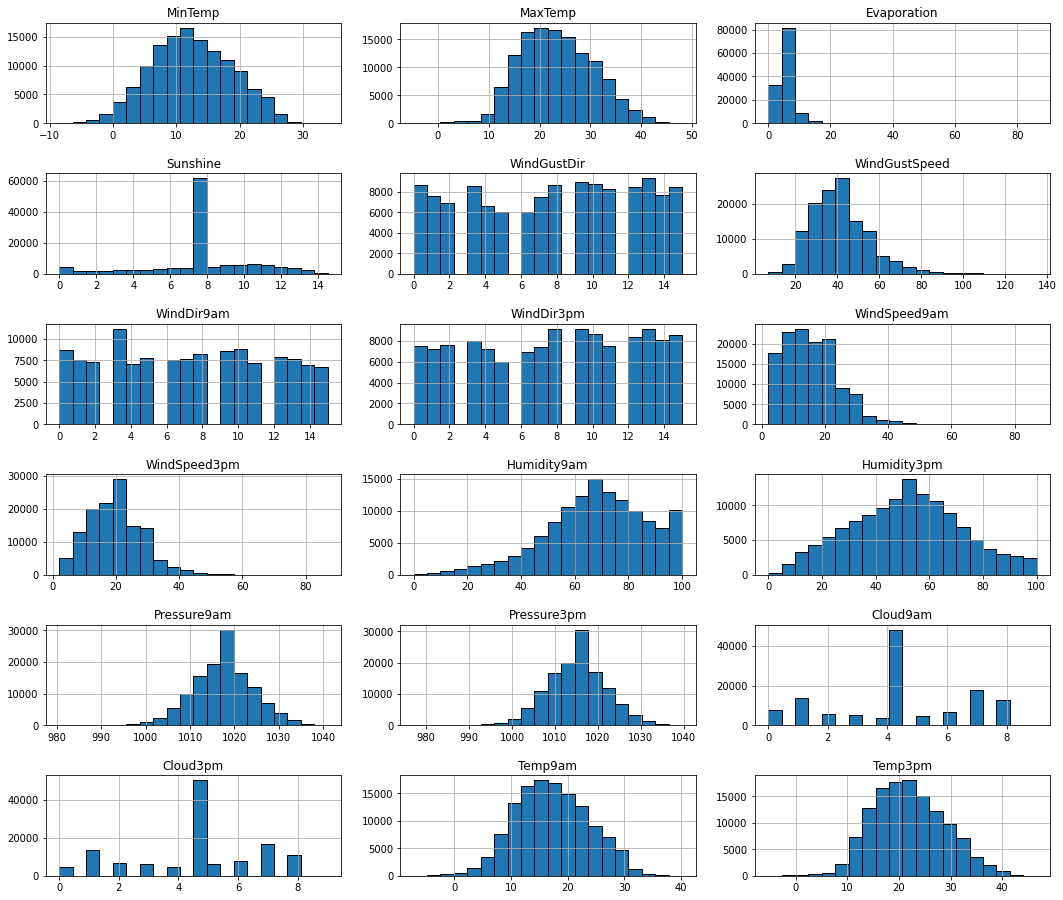

7.690376513472721
7.690293512821349


In [161]:
plot_hist_all_columns(df)

print(regression_metrics(y_test, lreg_pred)['RMSE'])
print(regression_metrics(y_test, bridge_pred)['RMSE'])

## Conclusie
#### Welke classifier had het beste resultaat?
BayesianRidge had een beter resultaat met een RMSE van 0.90894
#### Kwam dit overeen met de voorspelling? Waarom wel/niet?
Dit kwam overeen met mijn verwachting, al is het wel dat ze heel erg in de buurt zaten, en het verschil te negeren is.
Ik denk dat dit is omdat de dataset vrij makkelijk te voorspellen is.